# ImageBatch tutorial

In each section you will see examples of transformations that are performed by the choosen action. The section itself consists of several cells. Every cell has only one function invoking: ``plot_examples``. The first two arguments are not important, others are responsible for different parameters passed to an action. Action itself is perfomed with every item in the parameter's list. For example:

``
plot_examples(title = 'crop',
              action = lambda batch, **params: batch.crop(**params),
              origin = ['center', 'top_left', (14, 0), (0, 14)],
              shape = [(14, 14), (18, 18), (14, 24), (24, 14)])
``

in the [crop](#Crop) section will first invoke ``crop(origin='center', shape=(14,14)``, then  ``crop(origin='top_left', shape=(18,18)`` and etc. For every invocation two images are drawn in a line: before and after an action.

- [crop](#Crop)
- [flip](#Flip)
- [rotate](#Rotate)
- [shift](#Shift)
- [resize](#Resize)
- [scale](#Scale)
- [pad](#Pad)
- [transform](#Transform)
- [invert](#Invert)
- [clip](#Clip)
- [multiply](#Multiply)
- [multiplicative_noise](#Multiplicative_noise)
- [add](#Add)
- [additive_noise](#Additive_noise)
- [salt](#Salt)
- [filter](#Filter)
- [put_on_background](#Put_on_background)
- [pil_convert](#PIL_convert)
- [posterize](#Posterize)
- [cutout](#Cutout)
- [elastic_transform](#Elastic_transform)

Perhaps, any function from ``scipy.ndimage`` is accesible as `sp_<method_name>`. Just use it as a usual action (without specifying ``input`` parameter). Note that they only works with `scipy.ndarray` and usually much slower than respective `PIL` methods. 

In [1]:
import os
import sys
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import PIL
from matplotlib import pyplot as plt
%matplotlib inline

sys.path.append(os.path.abspath('../..'))
import batchflow as ds
from batchflow.opensets import CIFAR10, MNIST
from batchflow import B, V, C, F, R, P
from batchflow import Pipeline, ImagesBatch
from batchflow.utils import plot_images

### Auxiliary functions

In [2]:
def show_img(axis, image, title):
    axis.imshow(image)
    axis.set_title(title, fontsize=12)
    axis.tick_params(bottom='off', labelbottom='off', left='off', labelleft='off')

def plot_examples(title, action, title_action=True, **params):
    num_plots = 2 * len(list(params.values())[0])
    f, a = plt.subplots(1, num_plots, figsize=(16, 3))
    
    for i in range(num_plots // 2):
        batch = cifar_ds.train.next_batch(2)
        current_params = {k : v[i] for k, v in params.items()}
        show_img(a[i*2], batch.images[0], 'original')
        action(batch, **current_params)
        if title_action:
            title_action = '\n'.join((str(k)+'=' + str(v if not callable(v) else 'sampler') for k, v in current_params.items()))        
        else:
            title_action = ''
        show_img(a[i*2+1], batch.images[0], title_action)
    plt.suptitle(title, fontsize=18)

### Download and create CIFAR dataset

In [3]:
PATH_TO_CIFAR = None   
cifar_ds = CIFAR10(batch_class=ImagesBatch, path=PATH_TO_CIFAR)

# Crop

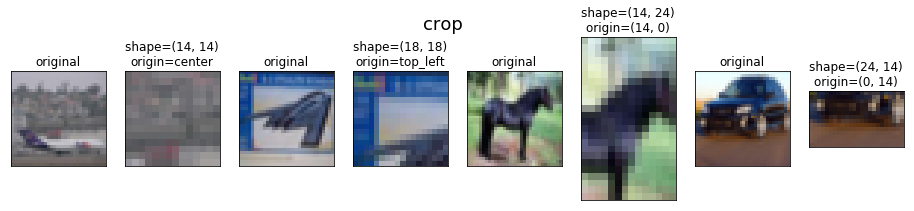

In [4]:
plot_examples(title = 'crop',
              action = lambda batch, **params: batch.crop(**params),
              origin = ['center', 'top_left', (14, 0), (0, 14)],
              shape = [(14, 14), (18, 18), (14, 24), (24, 14)])

##  Crop at random origin

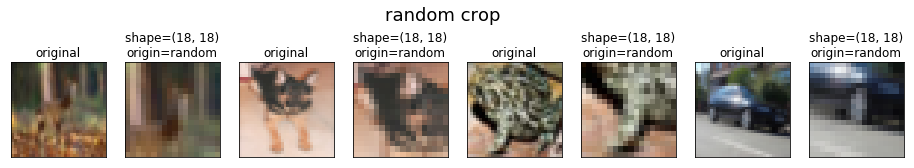

In [5]:
plot_examples(title = 'random crop',
              action = lambda batch, **params: batch.crop(**params),
              shape = [(18, 18)]*4,
              origin = ['random']*4)

# Flip

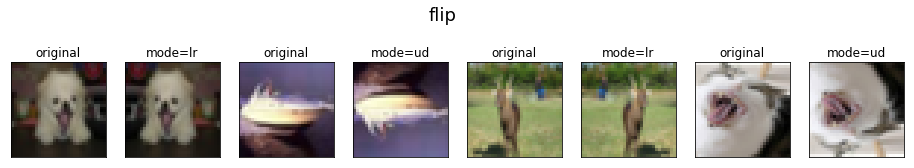

In [6]:
plot_examples(title = 'flip',
              action = lambda batch, **params: batch.flip(**params),
              mode = ['lr', 'ud', 'lr', 'ud'])

# Rotate

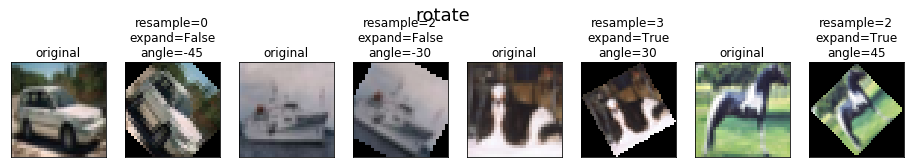

In [7]:
plot_examples(title = 'rotate',
              action = lambda batch, **params: batch.rotate(**params),
              angle = [-45, -30, 30, 45],
              resample = [PIL.Image.NEAREST, PIL.Image.BILINEAR, PIL.Image.BICUBIC, PIL.Image.BILINEAR],
              expand = [False, False, True, True])

# Shift

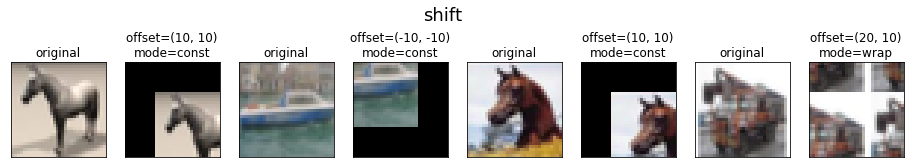

In [8]:
plot_examples(title = 'shift',
              action = lambda batch, **params: batch.shift(**params),
              offset = [(10, 10), (-10, -10), (10, 10), (20, 10)],
              mode = ['const', 'const', 'const', 'wrap'])

# Resize

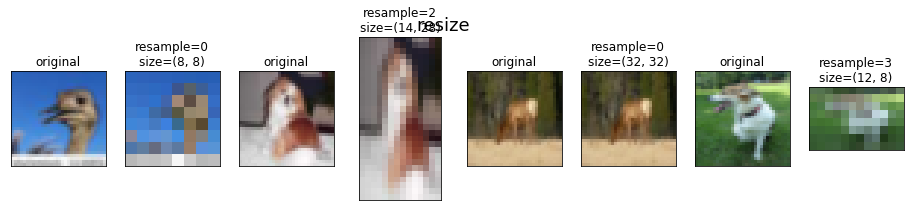

In [9]:
plot_examples(title = 'resize',
              action = lambda batch, **params: batch.resize(**params),
              size = [(8, 8), (14, 28), (32, 32), (12, 8)],
              resample = [0, 2, 0, 3])

# Scale

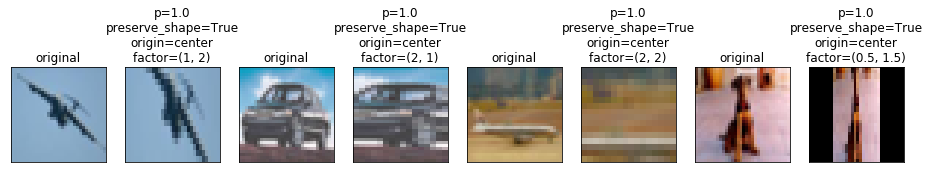

In [10]:
factor_sampler = lambda: (1, 1+2*np.random.beta(5,5))

plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*4,
#               factor=[factor_sampler() for i in range(4)],
              factor = [(1,2),(2, 1), (2,2), (0.5, 1.5)],
              preserve_shape=[True]*4,
              origin=['center']*4)

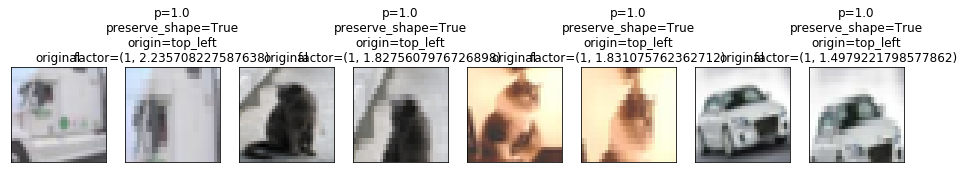

In [11]:
plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*4,
              factor=[factor_sampler() for i in range(4)],
              preserve_shape=[True]*4,
              origin=['top_left']*4)

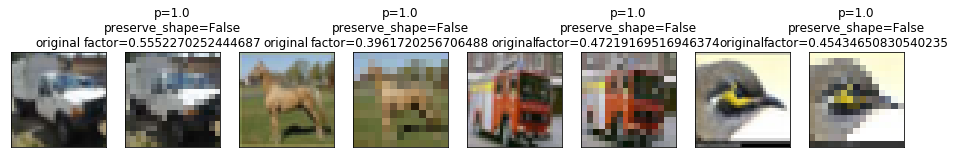

In [12]:
factor_sampler =  lambda: 0.3 + 0.4 * np.random.beta(5,5)

plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*4,
              factor=[factor_sampler() for i in range(4)],
              preserve_shape=[False]*4)

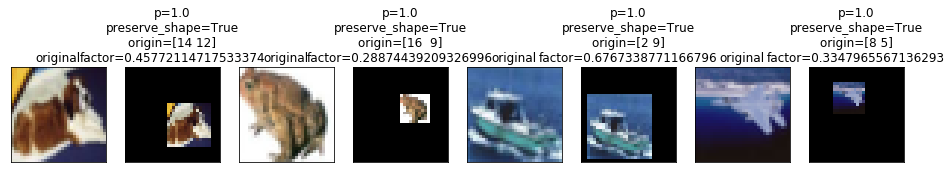

In [13]:
factor_sampler =  lambda: 0.1 + 0.7 * np.random.beta(2,2)
origin_sampler = lambda: (20 * np.random.beta(2,2,2)).astype(np.int)

plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*4,
              factor=[factor_sampler() for i in range(4)],
              preserve_shape=[True]*4,
              origin=[origin_sampler() for i in range(4)])

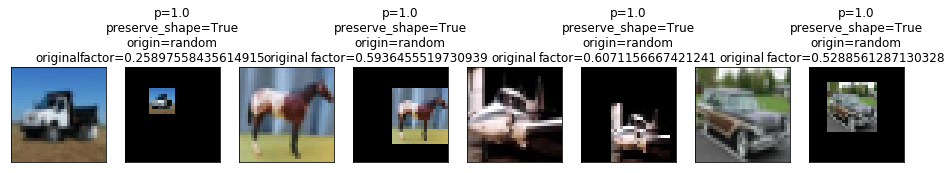

In [14]:
factor_sampler =  lambda: 0.1 + 0.7 * np.random.beta(2,2)

plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*4,
              factor=[factor_sampler() for i in range(4)],
              preserve_shape=[True]*4,
              origin=['random']*4)

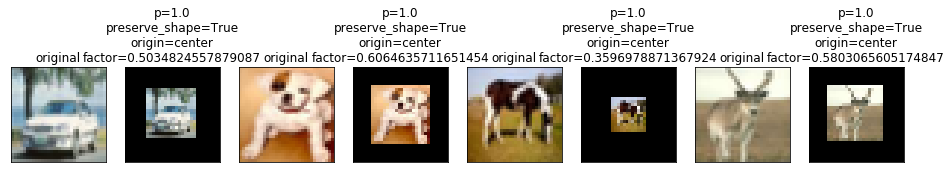

In [15]:
plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*4,
              factor=[factor_sampler() for i in range(4)],
              preserve_shape=[True]*4,
              origin=['center']*4)

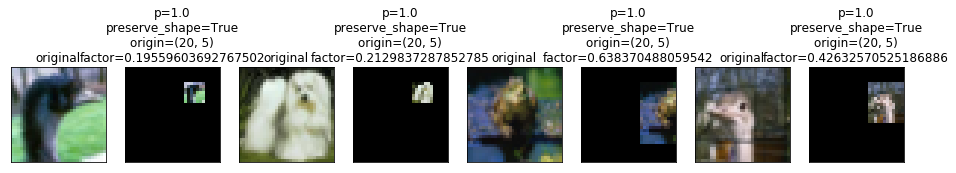

In [16]:
plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*4,
              factor=[factor_sampler() for i in range(4)],
              preserve_shape=[True]*4,
              origin=[(20,5)]*4)

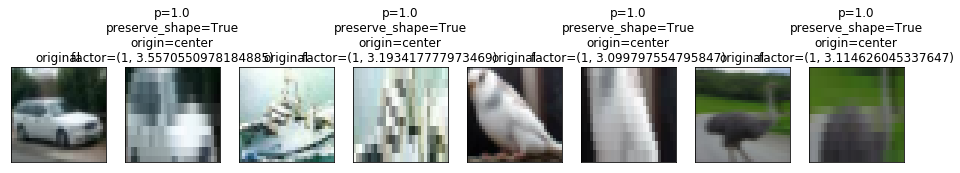

In [17]:
factor_sampler = lambda: (1, 2+2*np.random.beta(5,5))
plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*4,
              factor=[factor_sampler() for i in range(4)],
              preserve_shape=[True]*4,
              origin=['center']*4)

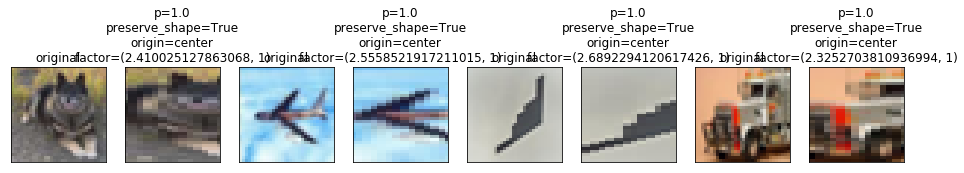

In [18]:
factor_sampler = lambda: (2+np.random.beta(5,5), 1)
plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*4,
              factor=[factor_sampler() for i in range(4)],
              preserve_shape=[True]*4,
              origin=['center']*4)

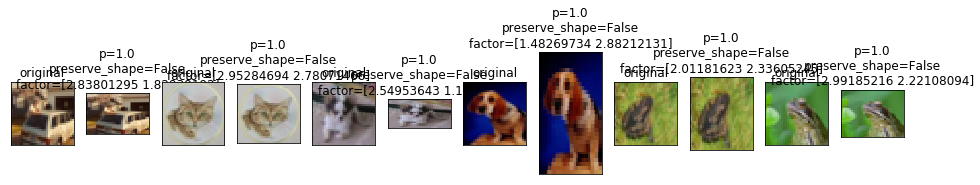

In [19]:
factor_sampler = lambda: (1+3*np.random.beta(2,2,2))
plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*6,
              factor=[factor_sampler() for i in range(6)],
              preserve_shape=[False]*6)

# Pad

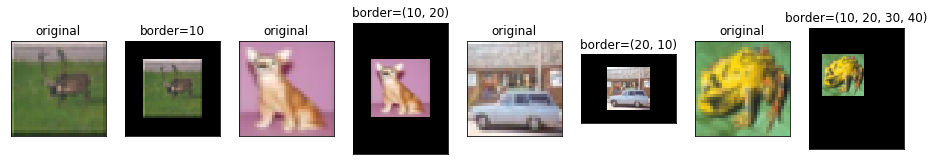

In [20]:
plot_examples(title = '',
              action = lambda batch, **params: batch.pad(**params),
              border=[10, (10, 20), (20,10), (10,20,30,40)])

# Transform

In [21]:
# https://stackoverflow.com/questions/14177744/how-does-perspective-transformation-work-in-pil
def find_coeffs(pa, pb):
    matrix = []
    for p1, p2 in zip(pa, pb):
        matrix.append([p1[0], p1[1], 1, 0, 0, 0, -p2[0]*p1[0], -p2[0]*p1[1]])
        matrix.append([0, 0, 0, p1[0], p1[1], 1, -p2[1]*p1[0], -p2[1]*p1[1]])

    A = np.matrix(matrix, dtype=np.float)
    B = np.array(pb).reshape(8)

    res = np.dot(np.linalg.inv(A.T * A) * A.T, B)
    return np.array(res).reshape(8)

from_ = [(0, -5), (32, 3), (32, 29), (0, 37)]
to_ = [(0, 0), (32, 0), (32, 32), (0, 32)]
coeffs = find_coeffs(from_, to_)

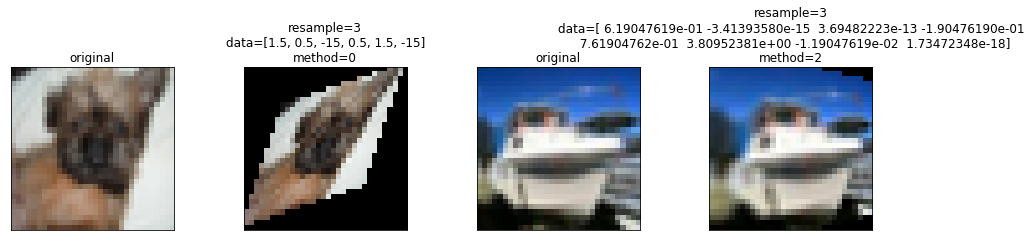

In [22]:
plot_examples(title = '',
              action = lambda batch, **params: batch.transform(**params),
              method=[PIL.Image.AFFINE, PIL.Image.PERSPECTIVE],
              resample=[3, 3],
              data=[[1.5,0.5,-15,0.5,1.5,-15], coeffs])

# Invert

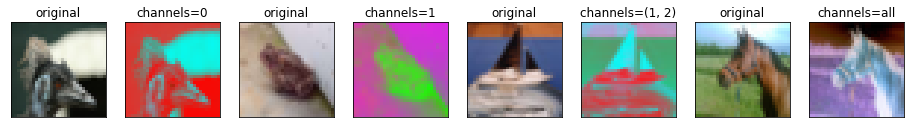

In [23]:
plot_examples(title = '',
              action = lambda batch, **params: batch.invert(**params),
              channels=[0, 1, (1, 2), 'all'])

# Clip

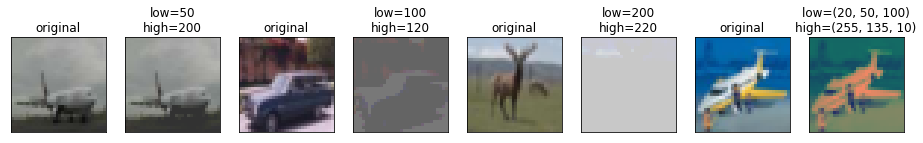

In [24]:
plot_examples(title = '',
              action = lambda batch, **params: batch.clip(**params),
              low = [50, 100, 200] + [(20, 50, 100)],
              high = [200, 120, 220] + [(255, 135, 10)])

# Multiply

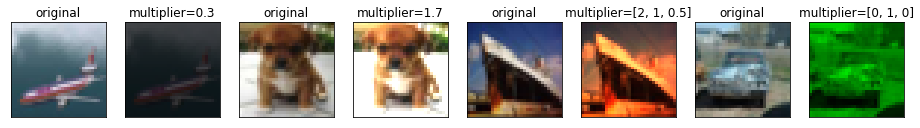

In [25]:
plot_examples(title = '',
              action = lambda batch, **params: batch.multiply(**params),
#               multiplier=[2*np.random.random() for i in range(3)] + [(2,1,0.5)],
              multiplier=[0.3, 1.7, [2, 1, 0.5], [0, 1, 0]])

# Multiplicative_noise

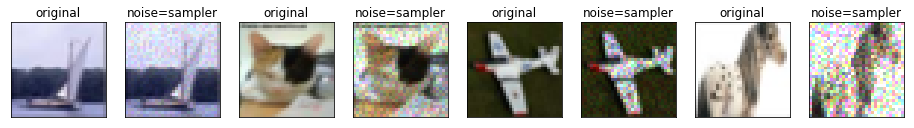

In [26]:
plot_examples(title = '',
              action = lambda batch, **params: batch.multiplicative_noise(**params),
              noise = [lambda size: np.random.uniform(0.9, 1.1, size=size),
                       lambda size: np.random.uniform(0.8, 1.2, size=size),
                       lambda size: np.random.uniform(0.7, 1.3, size=size),
                       lambda size: np.random.uniform(0.6, 1.4, size=size)])

# Add

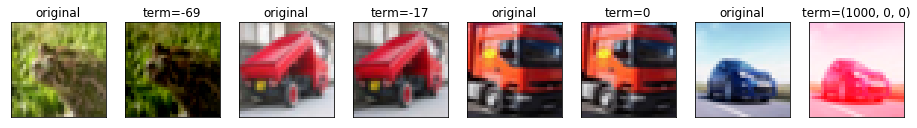

In [27]:
plot_examples(title = '',
              action = lambda batch, **params: batch.add(**params),
              term=[-100+ int(200*np.random.random()) for i in range(3)] + [(1000,0,0)])

# Additive_noise

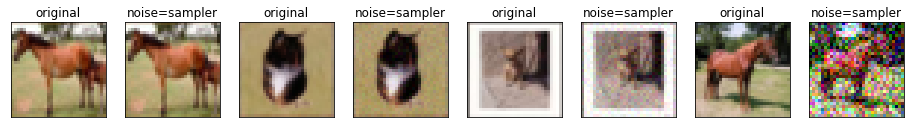

In [28]:
plot_examples(title = '',
              action = lambda batch, **params: batch.additive_noise(**params),
              noise = [lambda size: np.random.normal(0,1,size=size),
                       lambda size: np.random.normal(0,5,size=size),
                       lambda size: np.random.normal(0,10,size=size),
                       lambda size: np.random.normal(0,50,size=size)])

# Salt

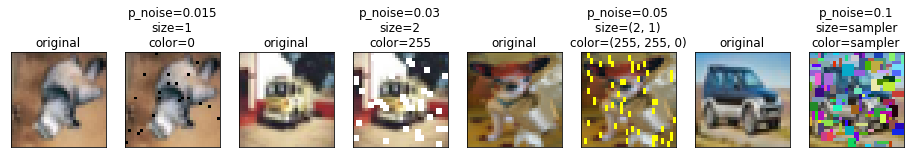

In [29]:
salt_generator=lambda: np.uint8(255*np.random.random(3))
size_generator=lambda: np.random.randint(1, 5, 2)
plot_examples(title = '',
              action = lambda batch, **params: batch.salt(**params),
              color=[0, 255, (255,255,0), salt_generator],
              p_noise=[0.015, 0.03, 0.05, 0.1],
              size=[1, 2, (2,1),size_generator])

# Filter

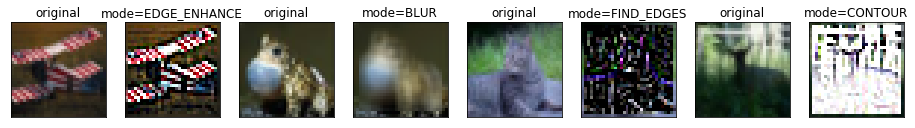

In [30]:
plot_examples(title = '',
              action = lambda batch, **params: batch.filter(**params),
              mode=['EDGE_ENHANCE','BLUR', 'FIND_EDGES', 'CONTOUR']
              )

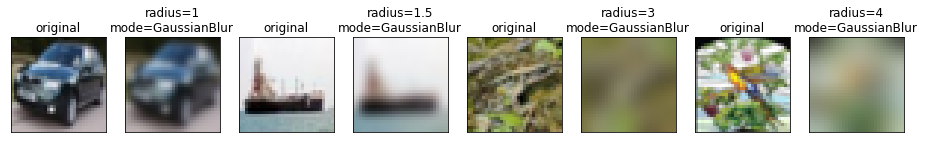

In [31]:
plot_examples(title = '',
              action = lambda batch, **params: batch.filter(**params),
              mode=['GaussianBlur']*4,
              radius=[1,1.5,3,4]
              )

# Put_on_background

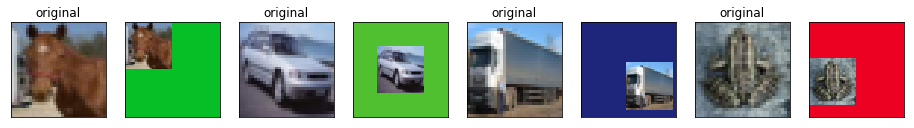

In [32]:
backgrounds = [(255*np.ones((64,64,3)) * np.random.random(3)).astype(np.uint8) for i in range(4)]
plot_examples(title = '',
              action = lambda batch, **params: batch.put_on_background(**params),
              background=backgrounds,
              origin=['top_left', 'center', 'random', 'random'],
              title_action=False)

# PIL_convert

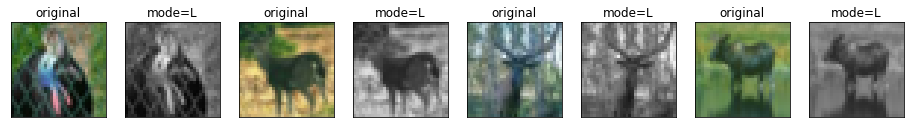

In [33]:
plot_examples(title = '',
              action = lambda batch, **params: batch.pil_convert(**params),
              mode=["L"]*4)

# Posterize

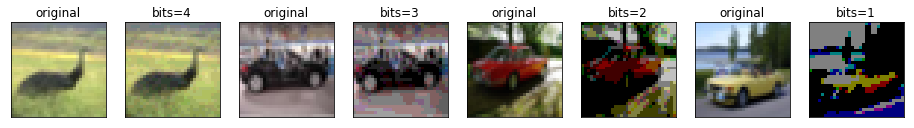

In [34]:
plot_examples(title = '',
              action = lambda batch, **params: batch.posterize(**params),
              bits=[4, 3, 2, 1])

# Cutout

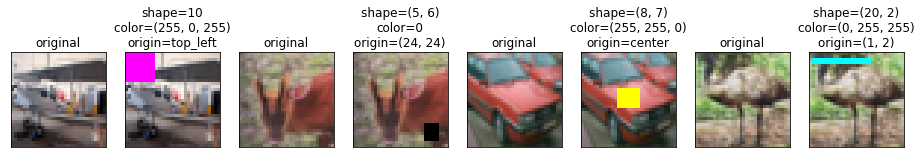

In [35]:
plot_examples(title = '',
              action = lambda batch, **params: batch.cutout(**params),
              origin = ['top_left', (24,24), 'center', (1,2)],
              shape = [10, (5,6), (8,7), (20,2)],
              color = [(255, 0, 255), 0, (255,255,0), (0,255,255)])

# Elastic_transform

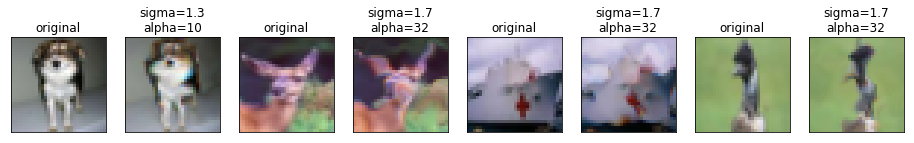

In [36]:
plot_examples(title = '',
              action = lambda batch, **params: batch.elastic_transform(**params),
              alpha = [10, 32, 32, 32],
              sigma = [1.3, 1.7, 1.7, 1.7])

# crop_to_patches

Here you will see the difference between different values of ``droplast``.

Extracting...
Extracted


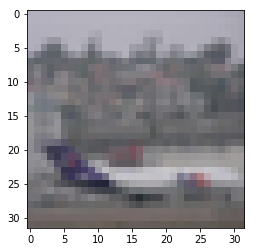

In [37]:
# First, lets add ``patches`` component where patches will be stored
class MyImagesBatch(ImagesBatch):
    components = "images", "labels", "patches"
    
cifar_patches_ds = CIFAR10(batch_class=MyImagesBatch, path=PATH_TO_CIFAR)
b = cifar_patches_ds.train.next_batch(2)
plt.imshow(b.images[0])

> ``droplast=False``

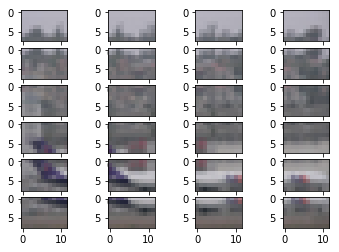

In [38]:
# note that you must specify ``src`` to write patches to
b.split_to_patches(patch_shape=(8,12),
                   stride=(5,7),
                   droplast=False,
                   src='images', dst='patches')
f, a = plt.subplots(6, 4)
for i, ai in enumerate(a.flatten()):
    ai.imshow(b.patches[i])

> ``droplast=True``

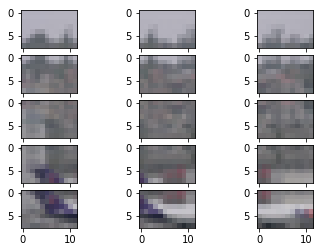

In [39]:
# note that you must specify ``src`` to write patches to
b.split_to_patches(patch_shape=(8,12),
                   stride=(5,7),
                   droplast=True,
                   src='images', dst='patches')
f, a = plt.subplots(5, 3)
for i, ai in enumerate(a.flatten()):
    ai.imshow(b.patches[i])

# Pipeline example

* By default, every element in a batch is transformed with parameters which are common for all elements in the batch (for example, angle=R('normal') first samples an angle then it rotates all images in the batch by equal angle). For example:

In [40]:
# here ``angle`` is sampled
augmentation_pipeline = Pipeline()\
                        .rotate(angle=R('normal', loc=0, scale=25))

pipeline = cifar_ds.train.p + augmentation_pipeline

``cifar_10`` attribute ``classes`` stores the classes names. See the [docs](https://analysiscenter.github.io/batchflow/api/batchflow.opensets.html#cifar10) for more info.

In [41]:
classes = cifar_ds.classes

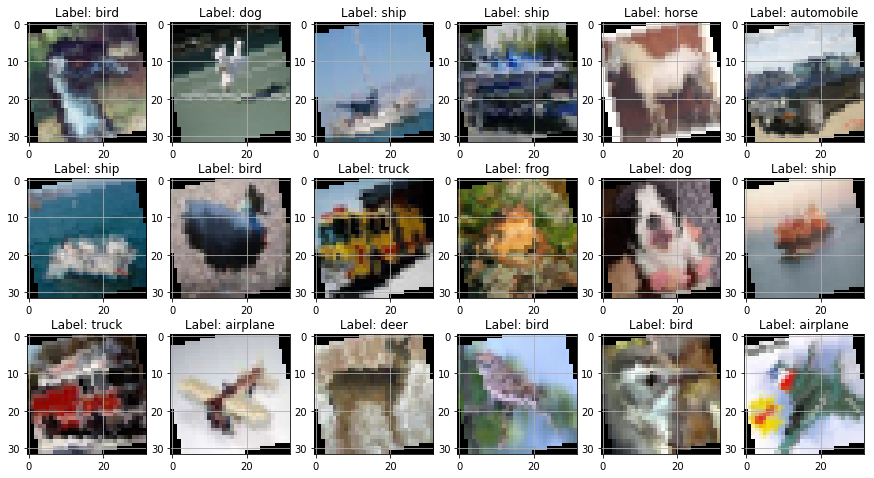

In [43]:
batch = pipeline.next_batch(batch_size=18, shuffle=True, n_epochs=None, drop_last=False)

# all images in ``batch`` are rotated by the equal angle
plot_images(batch.images, labels=batch.labels, classes=classes, ncols=6, figsize=(15, 11))

* To sample a parameter for every element, use ``P(R(...))`` named expression

In [44]:
# here angle is sampled for every element in a batch
# don't forget to crop images to the same size after rotation
augmentation_pipeline = Pipeline()\
                        .rotate(angle=P(R('normal', loc=0, scale=25)))

pipeline = cifar_ds.train.p + augmentation_pipeline

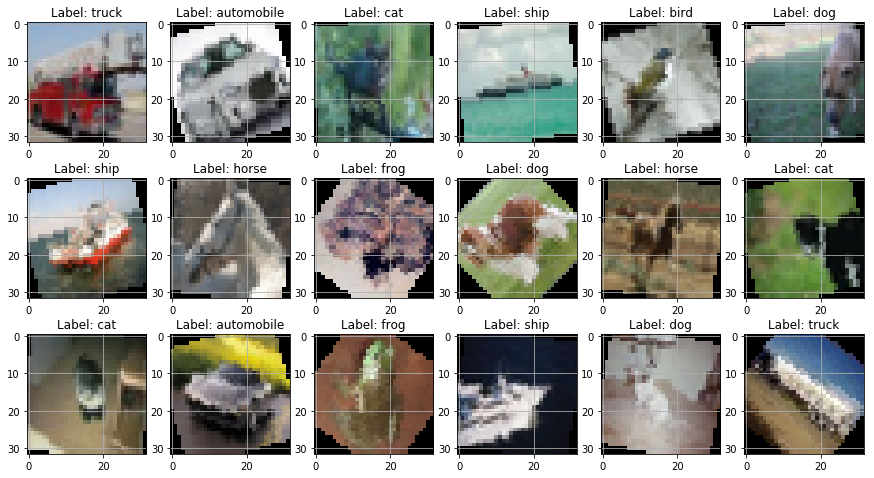

In [45]:
batch = pipeline.next_batch(batch_size=18, shuffle=True, n_epochs=None, drop_last=False)

# now angle is random for every element in ``batch``
plot_images(batch.images, labels=batch.labels, classes=classes, ncols=6, figsize=(15, 11))

* You can stack several actions

In [46]:
# if you use custom generator then it must have ``size`` parameter
# which determines the number of values to sample
salt_generator = lambda size=1: 255*np.random.random(size=(size,3))

augmentation_pipeline = Pipeline()\
                        .salt(color=P(R(salt_generator)),
                                          p_noise=P(R('uniform', 0.01, 0.3)), p=0.5)\
                        .rotate(angle=P(R('normal', loc=0, scale=25)), p=0.5)

pipeline = cifar_ds.train.p + augmentation_pipeline

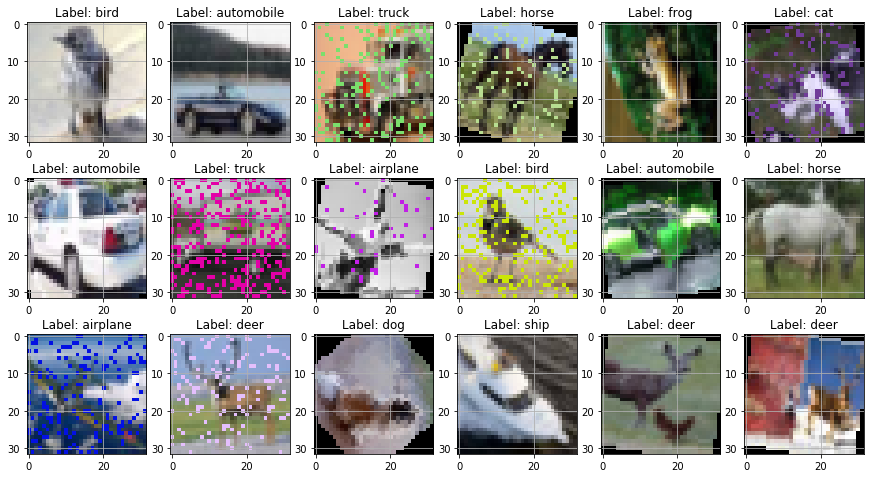

In [47]:
batch = pipeline.next_batch(batch_size=18, shuffle=True, n_epochs=None, drop_last=False)

plot_images(batch.images, labels=batch.labels, classes=classes, ncols=6, figsize=(15, 11))